# II. Programming and critical analysis

## Setup

In [39]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

In [42]:
heart_disease = pd.read_csv("Heart Disease Data.csv")

In [43]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
y = heart_disease["target"]
X = heart_disease.drop("target", axis=1)

## Instance StratifiedKfolds

In [45]:
strat_kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

## Exercise 1

### a.

In [64]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
gnb_clf = GaussianNB()

In [65]:
knn_cv_scores = cross_val_score(knn_clf, X, y, cv=strat_kfolds, scoring="accuracy")
knn_cv_scores

array([0.62295082, 0.57377049, 0.67213115, 0.7       , 0.7       ])

In [66]:
gnb_cv_scores = cross_val_score(gnb_clf, X, y, cv=strat_kfolds, scoring="accuracy")
gnb_cv_scores

array([0.8852459 , 0.80327869, 0.80327869, 0.85      , 0.83333333])

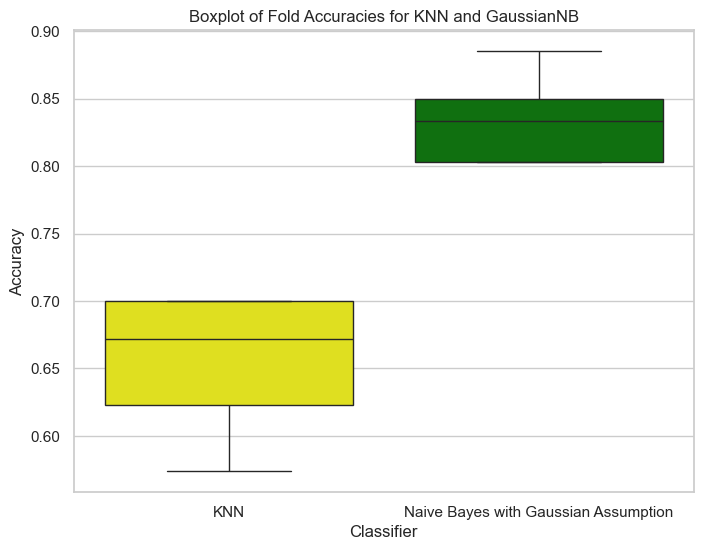

In [67]:
all_scores = list()
for score in knn_cv_scores:
    all_scores.append({
        "Classifier": "KNN",
        "Accuracy": score
    })

for score in gnb_cv_scores:
    all_scores.append({
        "Classifier": "Naive Bayes with Gaussian Assumption",
        "Accuracy": score
    })

scores_df = pd.DataFrame(all_scores)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x="Classifier", y="Accuracy", data=scores_df, hue="Classifier", palette=["yellow", "green"])
plt.title("Boxplot of Fold Accuracies for KNN and GaussianNB")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.show()

##

## Exercise 2

In [68]:
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

In [69]:
knn_cv_scaled_scores = cross_val_score(knn_clf, X_scaled, y, cv=strat_kfolds, scoring="accuracy")
knn_cv_scaled_scores

array([0.83606557, 0.80327869, 0.85245902, 0.83333333, 0.78333333])

In [70]:
gnb_cv_scaled_scores = cross_val_score(gnb_clf, X_scaled, y, cv=strat_kfolds, scoring="accuracy")
gnb_cv_scaled_scores

array([0.8852459 , 0.80327869, 0.80327869, 0.85      , 0.83333333])

In [ ]:
print("Original KNN score:",round(np.mean(knn_cv_scores),2),"±",round(np.std(knn_cv_scores),2))
print("KNN score on scaled dataset:",round(np.mean(knn_cv_scores),2),"±",round(np.std(knn_cv_scores),2))